In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('vgsales.csv')
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.Publisher.value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Media Entertainment                1
New World Computing                1
Genterprise                        1
Rain Games                         1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [5]:
dataNull = data.isna().sum()
dataNull

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
data = data.dropna(how='any', axis=0)

In [7]:
data.duplicated().sum()

np.int64(0)

# Tujuan Visualisasi
1. Video Games & platform dengan penjualan tertinggi (pertama digabung trus dianalisis sendiri sendiri)
2. Region dengan penjualan tertinggi
3. Genre yang paling digemari based on sales

C:\Users\fauzu\AppData\Local\Temp\ipykernel_22936\1892448617.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


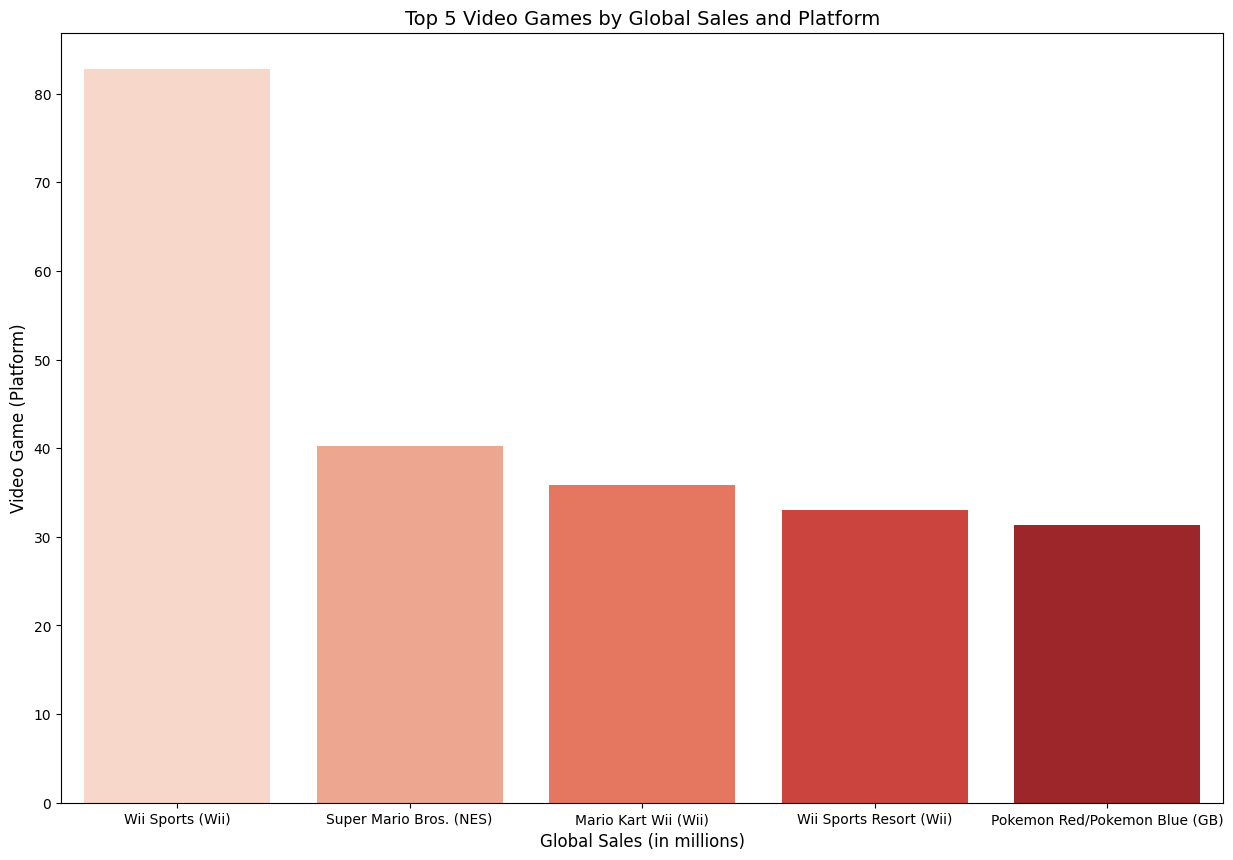

In [8]:
data['Game_Platform'] = data['Name'] + ' (' + data['Platform'] + ')'

top_5 = data.nlargest(5, 'Global_Sales')

plt.figure(figsize=(15, 10))
sns.barplot(
    x=top_5['Game_Platform'], 
    y=top_5['Global_Sales'], 
    palette='Reds'
)

plt.xlabel('Global Sales (in millions)', fontsize=12)
plt.ylabel('Video Game (Platform)', fontsize=12)
plt.title('Top 5 Video Games by Global Sales and Platform', fontsize=14)

plt.show()

C:\Users\fauzu\AppData\Local\Temp\ipykernel_22936\297954939.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=videoGame, y=sales, data=data, palette='Reds', hue=None)


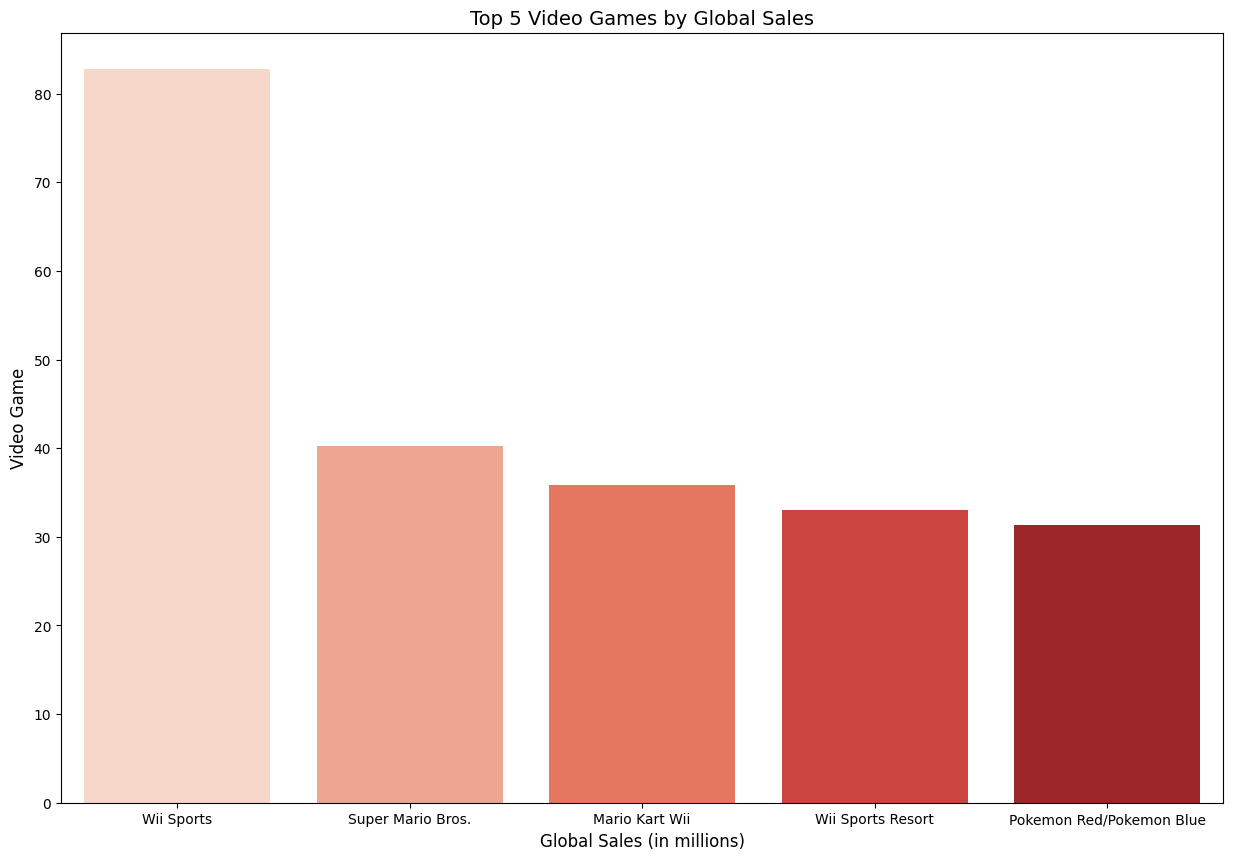

In [9]:
videoGame = data['Name'].head(5)
sales = data['Global_Sales'].head(5)

plt.figure(figsize=(15, 10))
sns.barplot(x=videoGame, y=sales, data=data, palette='Reds', hue=None)

plt.xlabel('Global Sales (in millions)', fontsize=12)
plt.ylabel('Video Game', fontsize=12)
plt.title('Top 5 Video Games by Global Sales', fontsize=14)

plt.show()

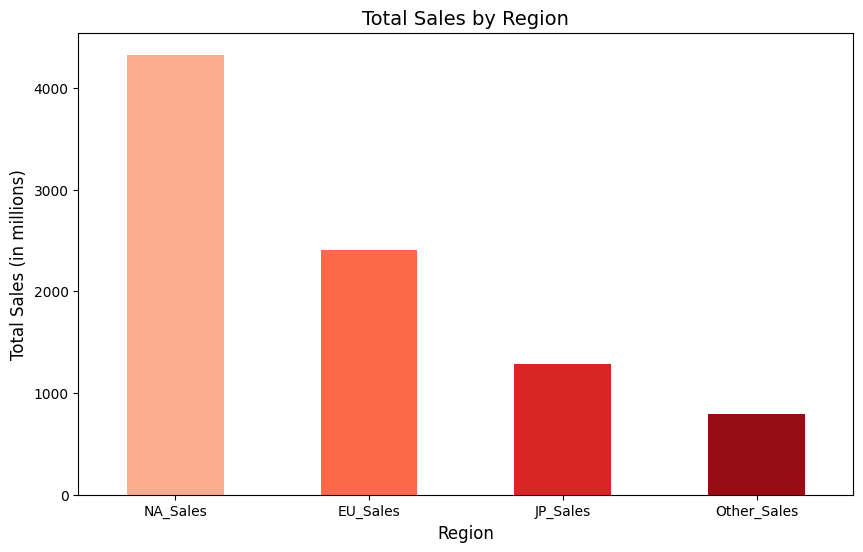

In [10]:
region_sales = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color=plt.cm.Reds([0.3, 0.5, 0.7, 0.9]))

plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales (in millions)', fontsize=12)
plt.title('Total Sales by Region', fontsize=14)

plt.xticks(rotation=0)
plt.show()


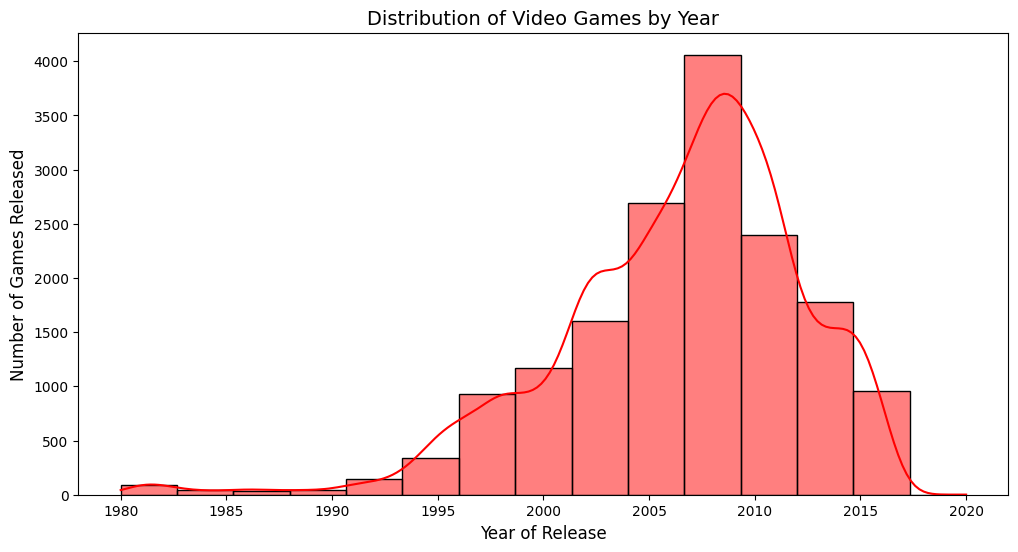

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Year'], bins=15, kde=True, color='red')

plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Number of Games Released', fontsize=12)
plt.title('Distribution of Video Games by Year', fontsize=14)

plt.show()


C:\Users\fauzu\AppData\Local\Temp\ipykernel_22936\500504947.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


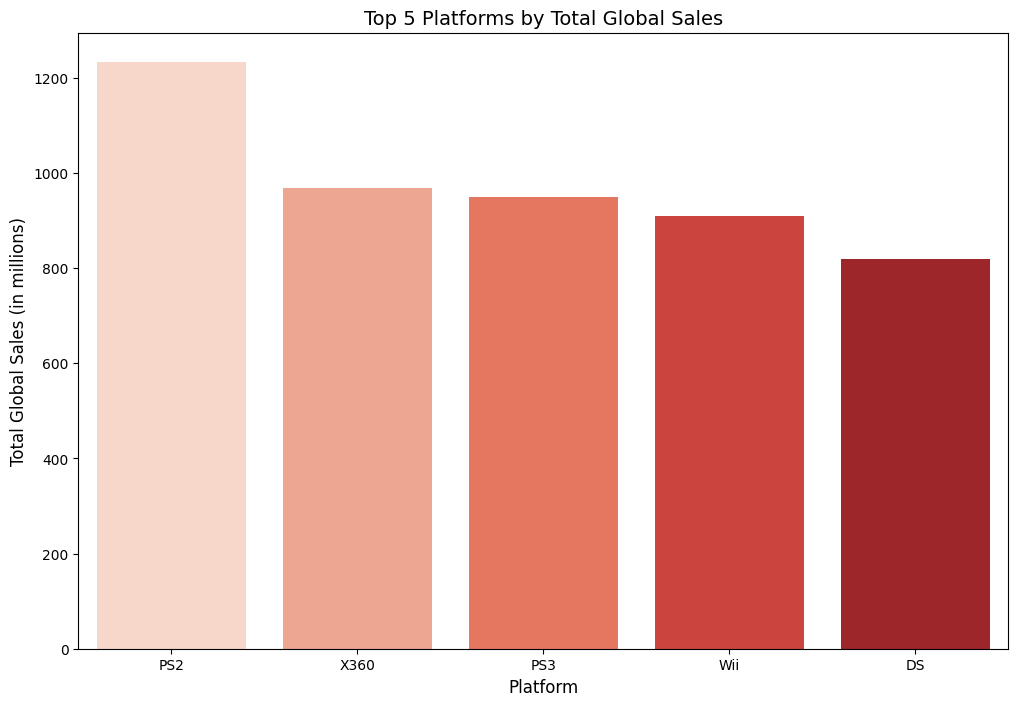

In [12]:
# Mengambil Top 5 Platform berdasarkan total Global Sales
top_5_platform = (
    data.groupby('Platform')['Global_Sales']
    .sum()
    .nlargest(5)
)

# Visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_5_platform.index,
    y=top_5_platform.values,
    palette='Reds'
)

# Label dan judul
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Total Global Sales (in millions)', fontsize=12)
plt.title('Top 5 Platforms by Total Global Sales', fontsize=14)

# Tampilkan plot
plt.show()


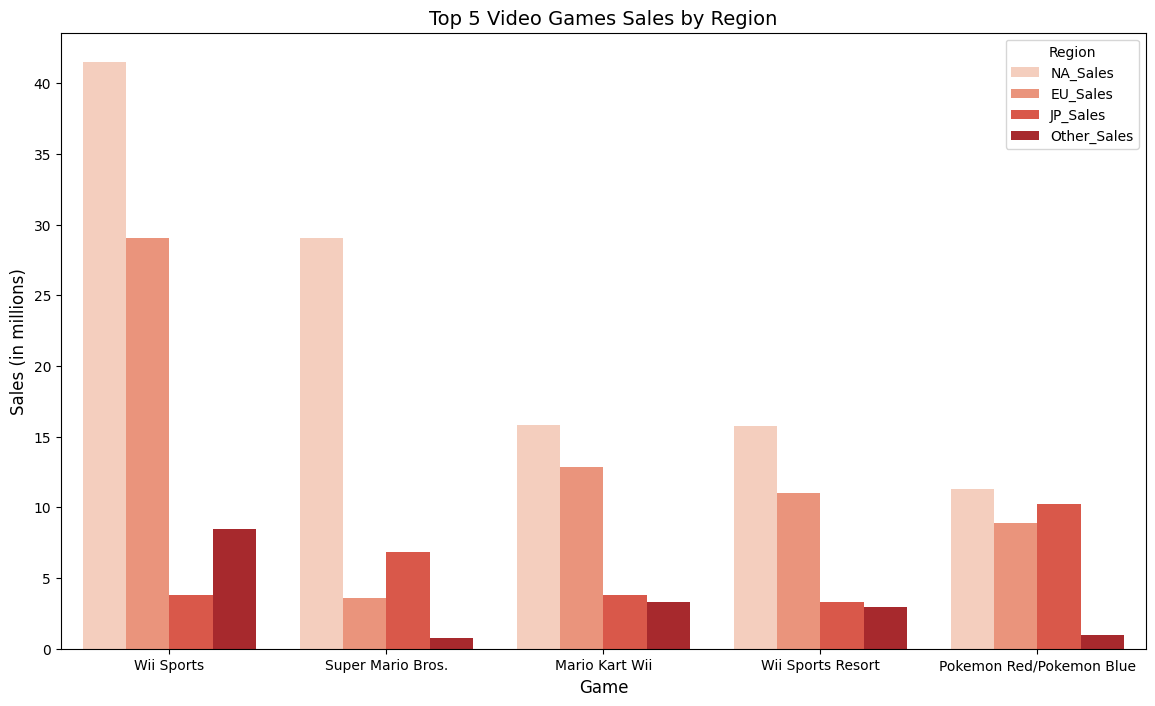

In [14]:
top_games = data.head(5)  # Ambil 5 game teratas
top_games_melted = top_games.melt(
    id_vars=['Name'], 
    value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
    var_name='Region',
    value_name='Sales'
)

plt.figure(figsize=(14, 8))
sns.barplot(x='Name', y='Sales', hue='Region', data=top_games_melted, palette='Reds')

plt.xlabel('Game', fontsize=12)
plt.ylabel('Sales (in millions)', fontsize=12)
plt.title('Top 5 Video Games Sales by Region', fontsize=14)

plt.legend(title='Region')
plt.show()
